In [1]:
#A_ch02_101_DecisionTreeRegressor.ipynb
#以decision tree 做迴歸--DecisionTreeRegressor
#以記憶體價格資料 ram_prices.csv 為例

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#step 0. 讀取資料
ram_prices=pd.read_csv("ram_price.csv")

In [4]:
#step 0.1 檢視資料 DataFrame 'ram_prices'
ram_prices

,Unnamed: 0,date,price
0,0,1957.00,4.110418e+08
1,1,1959.00,6.794772e+07
2,2,1960.00,5.242880e+06
3,3,1965.00,2.642412e+06
4,4,1970.00,7.340030e+05
5,5,1973.00,3.993600e+05
6,6,1974.00,3.145730e+05
7,7,1975.00,4.218880e+05
8,8,1975.08,1.802240e+05
9,9,1975.25,6.758400e+04


In [5]:
#reset index use 'date'
p_ram_prices=ram_prices.set_index('date')

In [6]:
%matplotlib inline

Text(0.5,0,'Year')

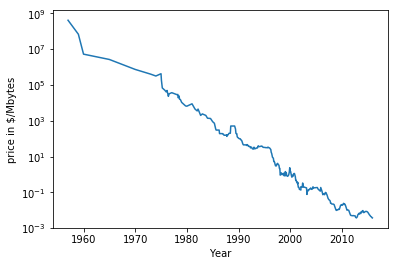

In [7]:
ax=p_ram_prices['price'].plot(logy=True) #y軸以對數尺度 logy=True
ax.set_ylabel("price in $/Mbytes")     #ylabel
ax.set_xlabel("Year")                  #xlabel

In [8]:
#=============================================================
# 目標--> 以2000年以前的資料對2000年後做預測
# 特徵--> 日期是唯一的特徵
# 模型--> 比較 DecisionTreeRegressor 與 LinearRegression
# 前置處理 --> 用對數重新調整價格，讓關係變為線性
#             並在訓練及預測後，使用指數映射來撤銷對數轉換

In [9]:
#DecisionTreeRegressor, LinearRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [10]:
#以布林陣列 ram_prices.data < 2000 擷取
#擷取2000前資料作為 train data
data_train=ram_prices[ram_prices.date < 2000]

In [11]:
#以布林陣列 ram_prices.data >= 2000 擷取
#擷取2000前後資料作為 test data
data_test=ram_prices[ram_prices.date >= 2000]

In [12]:
#將Serier 'data_train.date', 以 np.newaxis
#從 1D --> 2D, 設為 X_train
X_train=data_train.date[:,np.newaxis]

In [13]:
#檢視 X_train shape and ndim
print("X_train.shape -->",X_train.shape," X_train.ndim -->",X_train.ndim)

X_train.shape --> (202, 1)  X_train.ndim --> 2


In [14]:
#將price 以np.log() 做對數轉換
y_train=np.log(data_train.price)

In [15]:
#檢視 y_train shape and ndim
print("y_train.shape -->",y_train.shape," y_train.ndim -->",y_train.ndim)

y_train.shape --> (202,)  y_train.ndim --> 1


In [16]:
#fitting

#fit model, DecisionTreeRegressor
treeModel=DecisionTreeRegressor().fit(X_train,y_train)

In [17]:
#fit model, LinearRegression
linearRegModel=LinearRegression().fit(X_train,y_train)

In [18]:
#predict, model.predict() method
#以全部(date)資料作預測, 一樣要以 np.newaxis 擴充一個維度
X_all=ram_prices.date[:,np.newaxis]

In [19]:
pred_tree=treeModel.predict(X_all)
pred_lr=linearRegModel.predict(X_all)

In [20]:
#以指數函數 np.exp() 撤銷對數
price_tree=np.exp(pred_tree)
price_lr=np.exp(pred_lr)

In [21]:
#繪圖比較 DecisionTreeRegressor,LinearRegression
#以 plt.semilogy(), Make a plot with log scaling on the y axis.
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.semilogy.html

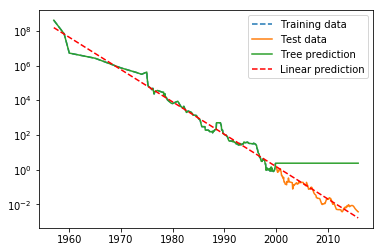

In [25]:
plt.semilogy(data_train.date, data_train.price, ls='--',label="Training data")
plt.semilogy(data_test.date,data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, c='r',ls='--',label="Linear prediction")
plt.legend()

In [26]:
#treeModel 在train data (2000年以前)幾乎完美的預測
#但是在train data外(2000年以後)只會保留最後一個已知點
#超過訓練資料範圍，tree mode 沒有辦法回應
#在以 tree 做基礎的模型皆有這個缺點